In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

In [2]:
def f(x1, x2):
    return x1**2 + 2 - 3 - x2

def g(x1, x2):
    return (2 - 3) * (1 - x1) - x2


In [3]:
def Phi(X):
    return f(X[0], X[1])**2 + g(X[0], X[1])**2

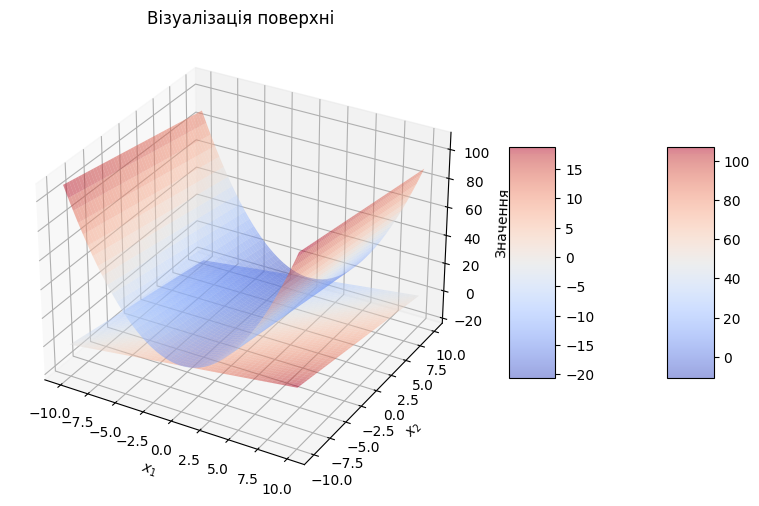

In [4]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

X1, X2 = np.meshgrid(x1, x2)

Z1 = f(X1, X2)
Z2 = g(X1, X2)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(X1, X2, Z1, cmap='coolwarm', alpha=0.5)
surf2 = ax.plot_surface(X1, X2, Z2, cmap='coolwarm', alpha=0.5)

ax.set_title('Візуалізація поверхні')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Значення')

fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
fig.colorbar(surf2, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [5]:
def F(X):
    try:
        return (1 - X[0])**2 + 100.0 * (X[1] - X[0]*X[0])**2
    except OverflowError:
        return np.inf

In [6]:
def Investigating_Search_Full(X0, X1, deltaX, eps, q):
    for i in range(len(X0)):
        X1[i] = X0[i]
    for i in range(len(X0)):
        while True:
            X1[i] = X0[i] + deltaX[i]
            if F(X1) < F(X0):
                break
            else:
                X1[i] = X0[i] - deltaX[i]
                if F(X1) < F(X0):
                    break
                else:
                    deltaX[i] /= q
                    X1[i] = X0[i]
                    if deltaX[i] < eps:
                        return 0
    return 0

In [7]:
def Investigating_Search_Simple(X0, X1, deltaX):
    for i in range(len(X0)):
        X1[i] = X0[i]
    for i in range(len(X0)):
        X1[i] = X0[i] + deltaX[i]
        if F(X1) < F(X0):
            continue
        else:
            X1[i] = X0[i] - deltaX[i]
            if F(X1) < F(X0):
                continue
            else:
                X1[i] = X0[i]
    return 0

In [8]:
def Difference(X, Y, eps):
    max_diff = max(abs(Y - X))
    return max_diff < eps

In [9]:
def Sample_Search(X0, X1, X2p, p):
    for i in range(len(X0)):
        X2p[i] = X0[i] + p * (X1[i] - X0[i])
    return 0

In [10]:
X0 = np.array([1, 1])
X1 = np.zeros(2)
k = 0
kmax = 1000
eps1 = 1e-10
eps2 = 1e-10
q = 2
p = 10
deltaX = np.full(len(X0), 0.01)
deltaX0 = np.full(len(X0), 0.01)
X2p = np.zeros(len(X0))
X2 = np.zeros(len(X0))

In [11]:
while k < kmax:
    k += 1
    print(f"\nk{k}\n")

    X0[:] = X1
    deltaX[:] = deltaX0

    Investigating_Search_Full(X0, X1, deltaX, eps1, q)
    print("ISF")

    if Difference(X0, X1, eps2):
        print("D1")
        break

    X2[:] = X1
    X1[:] = X0

    while True:
        X0[:] = X1
        X1[:] = X2
        Sample_Search(X0, X1, X2p, p)
        print("SS")
        deltaX[:] = deltaX0
        Investigating_Search_Simple(X2p, X2, deltaX)
        print("ISS")
        if Difference(X2p, X2, eps2):
            print("D2")
            break
        if Phi(X2) < Phi(X1):
            break

if k >= kmax:
    print("Максимальна кількість ітерацій")
else:
    print(f"Кількість ітерацій k={k}")

print("Остаточне рішення:")
for val in X0:
    print(f"{val:e}")

Streaming output truncated to the last 5000 lines.
SS
ISS
SS
ISS

k377

ISF
SS
ISS
SS
ISS

k378

ISF
SS
ISS
SS
ISS

k379

ISF
SS
ISS
SS
ISS

k380

ISF
SS
ISS
SS
ISS

k381

ISF
SS
ISS
SS
ISS

k382

ISF
SS
ISS
SS
ISS

k383

ISF
SS
ISS
SS
ISS

k384

ISF
SS
ISS
SS
ISS

k385

ISF
SS
ISS
SS
ISS

k386

ISF
SS
ISS
SS
ISS

k387

ISF
SS
ISS
SS
ISS

k388

ISF
SS
ISS
SS
ISS

k389

ISF
SS
ISS
SS
ISS

k390

ISF
SS
ISS
SS
ISS

k391

ISF
SS
ISS
SS
ISS

k392

ISF
SS
ISS
SS
ISS

k393

ISF
SS
ISS
SS
ISS

k394

ISF
SS
ISS
SS
ISS

k395

ISF
SS
ISS
SS
ISS

k396

ISF
SS
ISS
SS
ISS

k397

ISF
SS
ISS
SS
ISS

k398

ISF
SS
ISS
SS
ISS

k399

ISF
SS
ISS
SS
ISS

k400

ISF
SS
ISS
SS
ISS

k401

ISF
SS
ISS
SS
ISS

k402

ISF
SS
ISS
SS
ISS

k403

ISF
SS
ISS
SS
ISS

k404

ISF
SS
ISS
SS
ISS

k405

ISF
SS
ISS
SS
ISS

k406

ISF
SS
ISS
SS
ISS

k407

ISF
SS
ISS
SS
ISS

k408

ISF
SS
ISS
SS
ISS

k409

ISF
SS
ISS
SS
ISS

k410

ISF
SS
ISS
SS
ISS

k411

ISF
SS
ISS
SS
ISS

k412

ISF
SS
ISS
SS
ISS

k413

ISF
SS
ISS
SS
ISS

k414

ISF

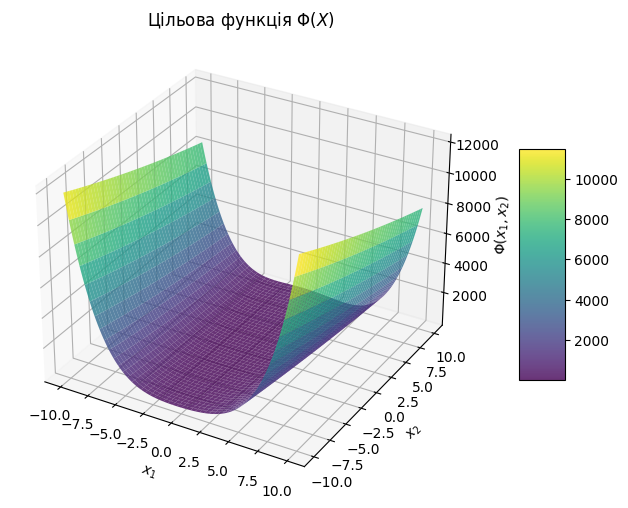

In [12]:
x1 = np.linspace(-10, 10, 400)
x2 = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

Z = Phi(np.array([X1, X2]))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

ax.set_title('Цільова функція $\\Phi(X)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$\\Phi(x_1, x_2)$')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()